# Problem statement.

Build a recommender system by using cosine simillarties score.


In [11]:
import pandas as pd
import numpy as np 
from html import unescape 
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('book (1).csv',encoding='latin1')
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [3]:
##--EDA--
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [4]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [5]:
df.tail()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [6]:
df.rename(columns={"User.ID":"user_id","Book.Title":"book_title","Book.Rating":"book_rating"},inplace=True)


In [7]:
df.iloc[:,1:]

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [8]:
# Remove inappropriate characters from column names
df.columns = df.columns.str.replace('[^\w\s]', '')
df

C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_15388\2027027081.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^\w\s]', '')


,Unnamed 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


<Axes: >

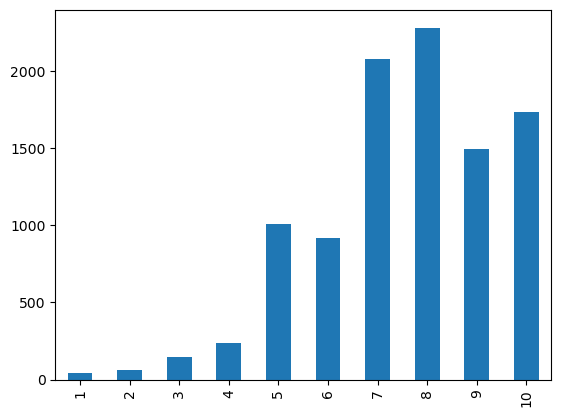

In [10]:
# Plotting the rating in the barplot
df['book_rating'].value_counts().sort_index().plot(kind='bar')


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x800 with 0 Axes>

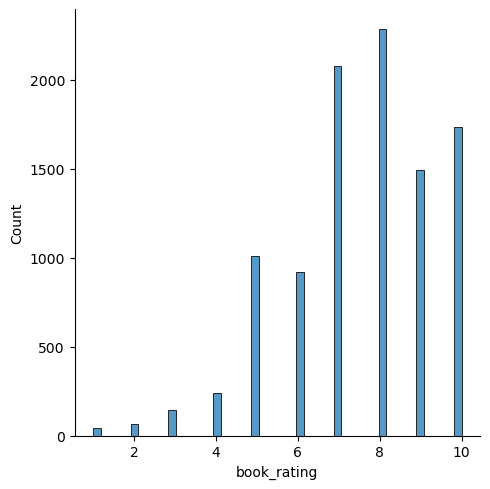

In [12]:
##---Dis-plot
plt.figure(figsize=(20,8))
sns.displot(df['book_rating'])

plt.show

In [65]:
top_books = df['book_title'].value_counts().head(10)
top_books.index


Index(['Fahrenheit 451', 'Charlie and the Chocolate Factory',
       'The Subtle Knife His Dark Materials Book 2',
       'The Amber Spyglass His Dark Materials Book 3', 'Stardust', 'Vanished',
       'Enders Game Ender Wiggins Saga Paperback', 'Pride and Prejudice',
       'Suzannes Diary for Nicholas', 'High Fidelity'],
      dtype='object')

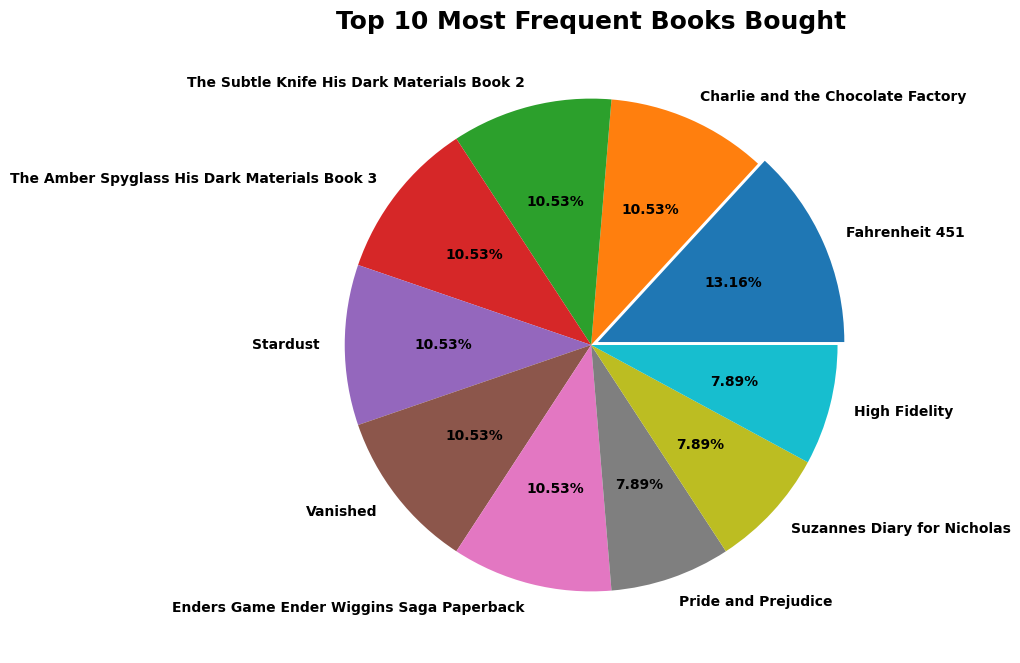

In [66]:
##--pie chart
plt.figure(figsize = (8,8))
plt.pie(top_books, labels=top_books.index,
        explode = [0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%', textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("Top 10 Most Frequent Books Bought", fontsize = 18, fontweight = 'bold');


In [14]:
# Clean up book titles
df['book_title'] = df['book_title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df.columns

Index(['Unnamed 0', 'user_id', 'book_title', 'book_rating'], dtype='object')

In [15]:
df_new=df.iloc[:,1:]
df_new

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu The Story of the Great Influenza Pandemic ...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried Adventures of a Happy Eater,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt A Practical Guide,7
9998,162121,Twilight,8


In [16]:
df_new.columns

Index(['user_id', 'book_title', 'book_rating'], dtype='object')

In [17]:
len(df_new)

10000

In [18]:
len(df_new.book_title.unique())

9647

In [19]:
len(df_new.user_id.unique())

2182

In [21]:
cosin=df_new.pivot_table(index="user_id",
                   columns="book_title",
                   values="book_rating")
cosin.columns


Index([' Jason Madison amp', ' Other StoriesMerril1985McClelland amp',
       ' Repairing PC Drives amp', '010100 A Novel of the Millennium',
       '10 Commandments Of Dating', '100 Great Fantasy Short Short Stories',
       '1001 Brilliant Ways to Checkmate',
       '101 Bright Ideas Esl Activities for All Ages', '101 Dalmatians',
       '101 Essential Tips House Plants',
       ...
       'Zits Unzipped  Sketchbook 5 Scott Jerry Zits Collection Sketchbook No 5',
       'Zlateh the Goat and Other Stories', 'Zodiac The EcoThriller', 'Zombie',
       'Zombies of the Gene Pool', 'Zoot Suit and Other Plays',
       'Zora Hurston and the Chinaberry Tree Reading Rainbow Book',
       'bermorgen', 'iI Paradiso Degli Orchi', 'stardust'],
      dtype='object', name='book_title', length=9647)

In [22]:
cosin.fillna(0,inplace=True)
cosin

book_title,Jason Madison amp,Other StoriesMerril1985McClelland amp,Repairing PC Drives amp,010100 A Novel of the Millennium,10 Commandments Of Dating,100 Great Fantasy Short Short Stories,1001 Brilliant Ways to Checkmate,101 Bright Ideas Esl Activities for All Ages,101 Dalmatians,101 Essential Tips House Plants,...,Zits Unzipped Sketchbook 5 Scott Jerry Zits Collection Sketchbook No 5,Zlateh the Goat and Other Stories,Zodiac The EcoThriller,Zombie,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree Reading Rainbow Book,bermorgen,iI Paradiso Degli Orchi,stardust
user_id,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


In [23]:
#calculating cosine similarity between users
from sklearn.metrics import pairwise_distances
metric=1-pairwise_distances(cosin.values,metric="cosine")
metric


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
np.fill_diagonal(metric,0)
metric

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
metric_df=pd.DataFrame(metric)
metric_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#set the index and columns names to user id
metric_df.index=df_new.user_id.unique()
metric_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
metric_df.iloc[:5,:5]

,0,1,2,3,4
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [29]:
metric_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
metric_df.idxmax(axis=1)[0:10]


276726       0
276729       0
276736       0
276737       0
276744       0
276745       0
276747       0
276748    2059
276751       0
276754       0
dtype: int64

In [49]:
# extract the books which userId 276813 have watched
id1=df[df['user_id']==14]
id1

,Unnamed 0,user_id,book_title,book_rating
2409,2410,14,COPS,5
2410,2411,14,A Cold Heart An Alex Delaware Novel,5
2411,2412,14,Dead Sleep,6


In [38]:
# extract the books which userId 8 have watched
id2=df[df['user_id']==8]
id2


,Unnamed 0,user_id,book_title,book_rating
2399,2400,8,Ancient Celtic Romances,5
2400,2401,8,The Western way A practical guide to the Weste...,5
2401,2402,8,Wings,5
2402,2403,8,Truckers,5
2403,2404,8,Keepers of the Earth Teachers Guide,6
2404,2405,8,The Celts Activity Book,6
2405,2406,8,The Art Of Celtia,7


In [50]:
# extract the books which userId 276813 & 8 have watched
df[(df['user_id']==14) | (df['user_id']==8)]


,Unnamed 0,user_id,book_title,book_rating
2399,2400,8,Ancient Celtic Romances,5
2400,2401,8,The Western way A practical guide to the Weste...,5
2401,2402,8,Wings,5
2402,2403,8,Truckers,5
2403,2404,8,Keepers of the Earth Teachers Guide,6
2404,2405,8,The Celts Activity Book,6
2405,2406,8,The Art Of Celtia,7
2409,2410,14,COPS,5
2410,2411,14,A Cold Heart An Alex Delaware Novel,5
2411,2412,14,Dead Sleep,6
